In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from IPython import display
from torchvision import datasets, transforms
import os

### Dataset

In [3]:
# Training Flags (hyperparameter configuration)
height = 28
width = 28
x_dim = height * width
z_dim = 2

In [4]:
# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.ToTensor(),
    ])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    ])

# choose the training and test datasets
train_data = datasets.MNIST('mnist_data', train=True, download=True, transform=transform)
test_data = datasets.MNIST('mnist_data', train=False, download=True, transform=test_transform)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=len(train_data))
test_loader = torch.utils.data.DataLoader(test_data, batch_size=len(test_data))

/home/gaudio/anaconda3/envs/ste/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448278899/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
X = next(iter(train_loader))[0].numpy().reshape([-1, x_dim])
print(X.shape)

X_indexes = np.random.randint(0, len(X), 1000)
X = X[X_indexes][:, :, None]
print(X.shape)

t = next(iter(train_loader))[1].numpy()[X_indexes]
print(t.shape)

(60000, 784)
(1000, 784, 1)
(1000,)


### Expectation & Maximization Functions Implementation

In [6]:
from numpy.linalg import inv

def get_M(W, variance):
    return W.T @ W + variance * np.eye(z_dim)

def get_z_mean(M_inv, W, x, x_mean):
    z_mean = M_inv @ W.T @ (x - x_mean)
    
    return z_mean

def get_z_cov(variance, M_inv, z_mean):
    return variance * M_inv + z_mean @ z_mean.T

def E_step(W, variance, X, x_mean):
    M = get_M(W, variance)
    M_inv = inv(M)
    
    z_means = []
    z_covs = []
    for i in range(len(X)):
        z_mean = get_z_mean(M_inv, W, X[i], x_mean)
        z_cov = get_z_cov(variance, M_inv, z_mean)
        z_means.append(z_mean)
        z_covs.append(z_cov)
    
    z_means = np.stack(z_means)
    z_covs = np.stack(z_covs)
    
    return z_means, z_covs

def get_W_new(X, x_mean, z_means, z_covs):
    # X: [N, x_dim, 1]
    # x_mean: [x_dim, 1]
    # z_means: [N, z_dim, 1]
    # z_covs: [N, z_dim, z_dim]
    
    a = np.zeros([x_dim, z_dim])
    for n in range(len(X)):
        a += (X[n] - x_mean) @ z_means[n].T
        
    b = np.zeros([z_dim, z_dim])
    for n in range(len(X)):
        b += z_covs[n]
        
    b = inv(b)
    
    return a @ b

def get_variance_new(X, x_mean, z_means, z_covs, W_new):
    # X: [N, x_dim, 1]
    # x_mean: [dim, 1]
    # z_means: [N, z_dim, 1]
    # z_covs: [N, z_dim, z_dim]
    # W_new: [x_dim, z_dim]
    
    for n in range(len(X)):
        a = np.linalg.norm(X[n] - x_mean[:, 0], ord=2)
        b = 2 * z_means[n].T @ W_new.T @ (X[n] - x_mean)
        c = np.trace(z_covs[n] @ W_new.T @ W_new)
        variance_new = np.sum(a - b + c) / (len(X) * x_dim)
        
        return variance_new
    
def M_step(X, x_mean, z_means, z_covs):
    # X: [N, x_dim, 1]
    # x_mean: [x_dim, 1]
    # z_means: [N, z_dim, 1]
    # z_covs: [N, z_dim, z_dim]
    
    W_new = get_W_new(X, x_mean, z_means, z_covs)
    variance_new = get_variance_new(X, x_mean, z_means, z_covs, W_new)
    
    return W_new, variance_new    

In [7]:
W = np.random.randn(x_dim, z_dim) * 0.01
variance = 0.01

x_mean = np.mean(X, axis=0)
 
for step in range(100):
    print(step, 'step')
    z_means, z_covs = E_step(W, variance, X, x_mean)
    W, variance = M_step(X, x_mean, z_means, z_covs)

0 step
1 step
2 step
3 step
4 step
5 step
6 step
7 step
8 step
9 step
10 step
11 step
12 step
13 step
14 step
15 step
16 step
17 step
18 step
19 step
20 step
21 step
22 step
23 step
24 step
25 step
26 step
27 step
28 step
29 step
30 step
31 step
32 step
33 step
34 step
35 step
36 step
37 step
38 step
39 step
40 step
41 step
42 step
43 step
44 step
45 step
46 step
47 step
48 step
49 step
50 step
51 step
52 step
53 step
54 step
55 step
56 step
57 step
58 step
59 step
60 step
61 step
62 step
63 step
64 step
65 step
66 step
67 step
68 step
69 step
70 step
71 step
72 step
73 step
74 step
75 step
76 step
77 step
78 step
79 step
80 step
81 step
82 step
83 step
84 step
85 step
86 step
87 step
88 step
89 step
90 step
91 step
92 step
93 step
94 step
95 step
96 step
97 step
98 step
99 step


### Plotting

In [8]:
# borrowed from https://gist.github.com/jakevdp/91077b0cae40f8f8244a
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

### Z-embedding Results

(1000, 2)


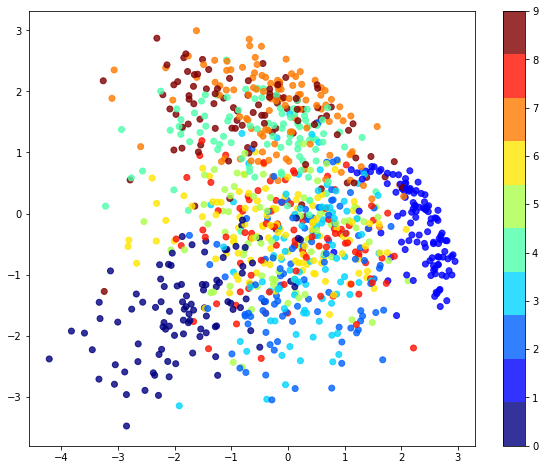

In [9]:
from numpy.linalg import inv

M = W.T @ W + variance * np.eye(z_dim)
M_inv = inv(M)

Z = []
labels = []
for index in range(0, len(X)):
    x = X[index]
    z = M_inv @ W.T @ (x - x_mean)
    Z.append(z[:, 0])
    labels.append(t[index])
    
Z = np.stack(Z)
labels = np.stack(labels)

print(Z.shape)

plt.figure(figsize=[10, 8])
plt.scatter(Z[:, 0], Z[:, 1], c=labels, cmap=discrete_cmap(10, 'jet'), alpha=0.8)
plt.colorbar()
plt.show()

### Interpolation Z-vectors

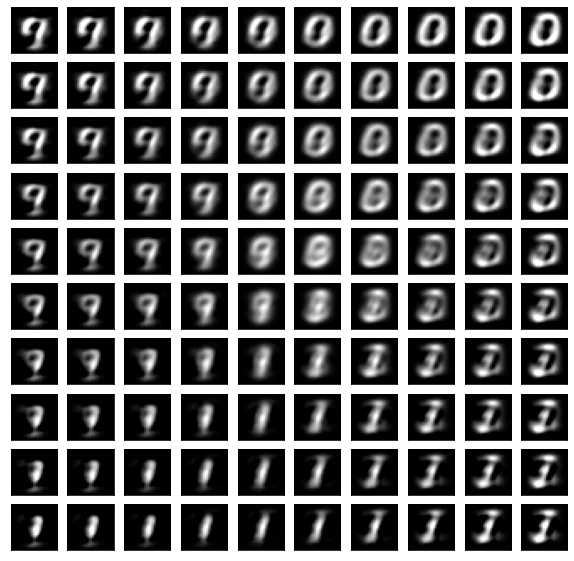

In [10]:
x_grid = np.linspace(-4, 4, 10)
y_grid = np.linspace(4, -4, 10)
xv, yv = np.meshgrid(x_grid, y_grid)
Z = np.stack([xv, yv], axis=2)

plt.figure(figsize=[10, 10])
for x_index in range(10):
    for y_index in range(10):
        z = Z[x_index][y_index][:, None]
        x = np.clip((W @ z + x_mean)[:, 0], 0, 1)
        
        plt.subplot(10, 10, x_index + 1 + y_index * 10)
        plt.xticks([], [])
        plt.yticks([], [])
        plt.imshow(x.reshape((height, width)), cmap='gray')
        
plt.show()
        